## Created by

Minan Abdillah

## Business Understanding

1. project from a lending company
2. credit risk analysis from the data provided
3. create a prediction model

## Import Library

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import learning_curve
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore")

## Load Data

In [2]:
df = pd.read_csv("data/loan_data_2007_2014.csv")
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Understanding

In [3]:
df.shape

(466285, 75)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [5]:
missing_value = df.isnull().sum()
missing_value

Unnamed: 0               0
id                       0
member_id                0
loan_amnt                0
funded_amnt              0
                     ...  
all_util            466285
total_rev_hi_lim     70276
inq_fi              466285
total_cu_tl         466285
inq_last_12m        466285
Length: 75, dtype: int64

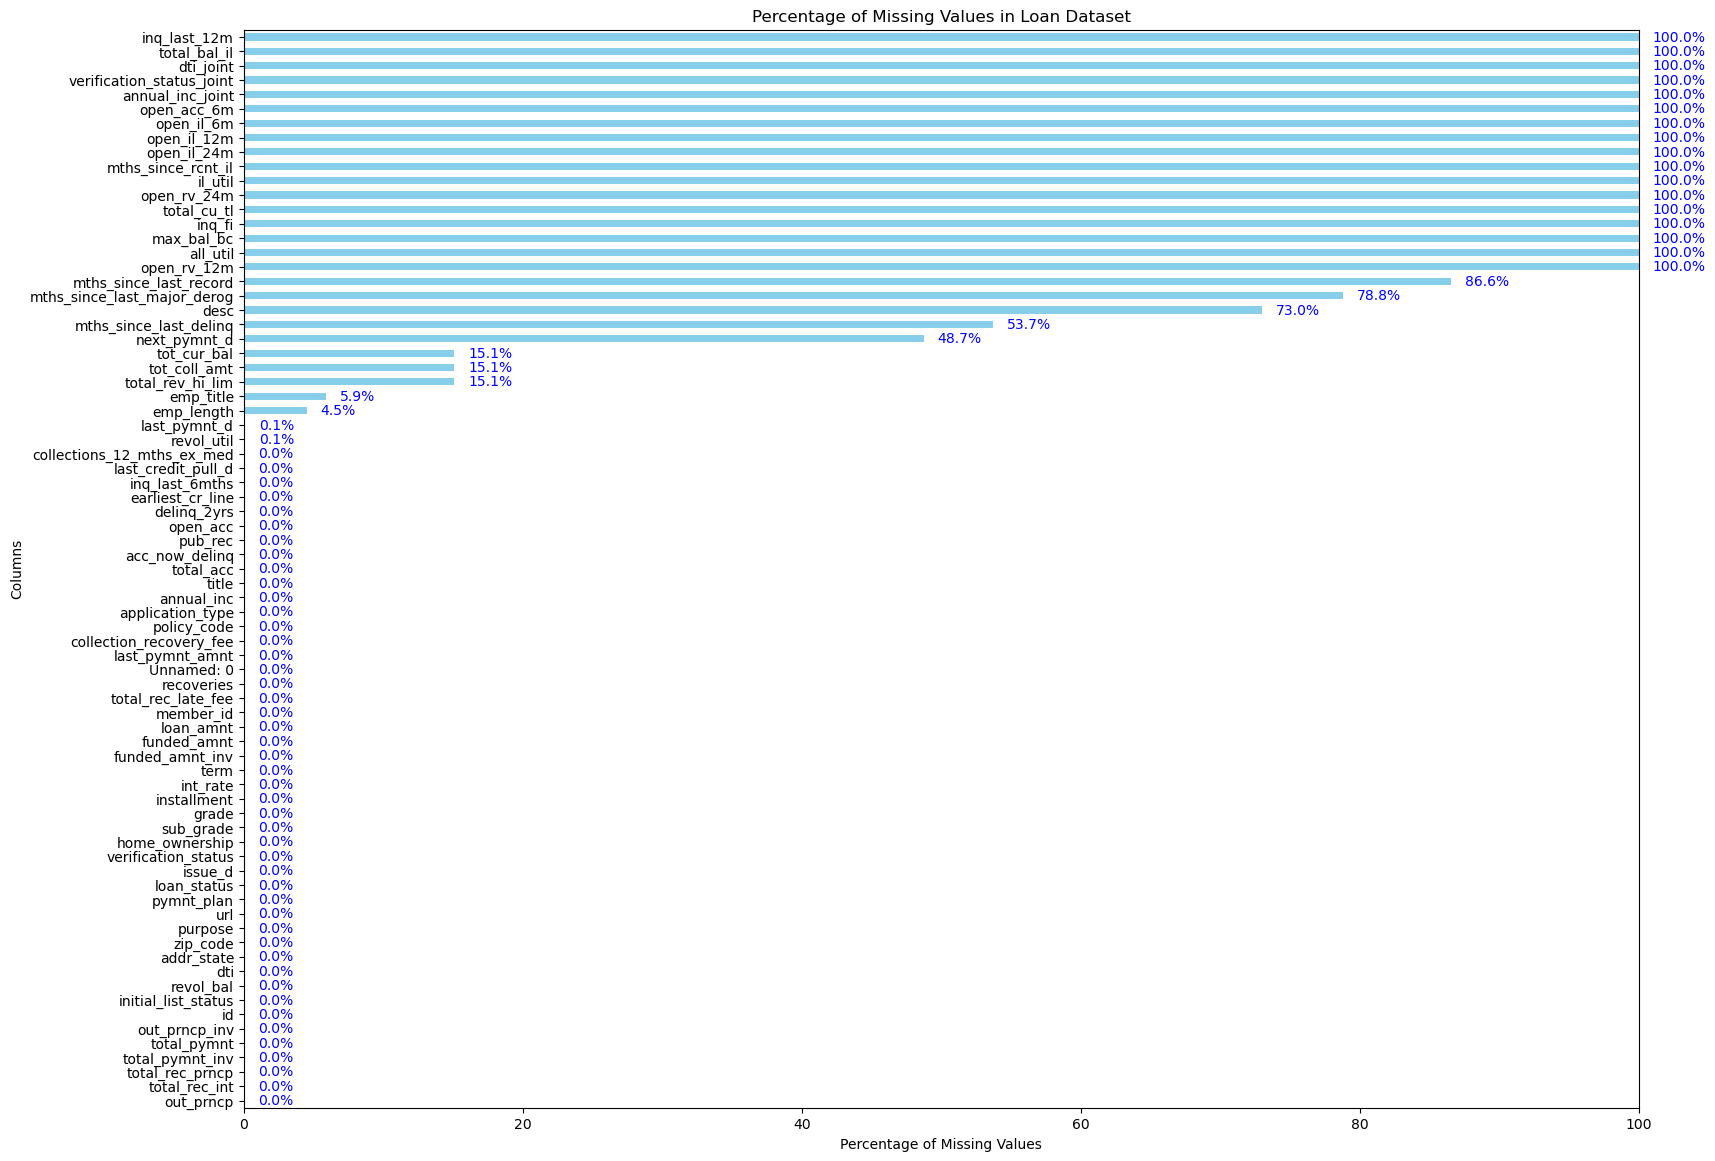

In [6]:
# Menghitung persentase nilai yang hilang dalam setiap kolom
missing_percentage = (missing_value / len(df)) * 100

missing_data = pd.DataFrame({'Total Missing': missing_value, 'Percentage': missing_percentage})

missing_data = missing_data.sort_values(by='Percentage', ascending=False)

plt.figure(figsize=(18, 14))
bars = missing_data['Percentage'].plot(kind='barh', color='skyblue')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Columns')
plt.title('Percentage of Missing Values in Loan Dataset')
plt.xlim(0, 100)
plt.gca().invert_yaxis()  
# Menambahkan teks pada setiap diagram
for i, v in enumerate(missing_data['Percentage']):
    plt.text(v + 1, i, f"{v:.1f}%", color='blue', va='center')

plt.show()

In [7]:
df.duplicated().sum()

0

## Data Cleaning

In [8]:
# Menghitung persentase nilai yang hilang dalam setiap kolom
missing_percentage = (missing_value / len(df)) * 100

# Mendapatkan nama kolom dengan persentase nilai yang hilang di atas 50%
columns_to_drop = missing_percentage[missing_percentage > 50].index

# Menghapus kolom-kolom yang memenuhi kriteria
df_cl = df.drop(columns=columns_to_drop)

print("Kolom yang dihapus:")
print(columns_to_drop)

Kolom yang dihapus:
Index(['desc', 'mths_since_last_delinq', 'mths_since_last_record',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m',
       'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util',
       'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi',
       'total_cu_tl', 'inq_last_12m'],
      dtype='object')


In [9]:
df_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 54 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  466285 non-null  int64  
 1   id                          466285 non-null  int64  
 2   member_id                   466285 non-null  int64  
 3   loan_amnt                   466285 non-null  int64  
 4   funded_amnt                 466285 non-null  int64  
 5   funded_amnt_inv             466285 non-null  float64
 6   term                        466285 non-null  object 
 7   int_rate                    466285 non-null  float64
 8   installment                 466285 non-null  float64
 9   grade                       466285 non-null  object 
 10  sub_grade                   466285 non-null  object 
 11  emp_title                   438697 non-null  object 
 12  emp_length                  445277 non-null  object 
 13  home_ownership

In [10]:
missing_value = df_cl.isnull().sum()

missing_percentage = (missing_value / len(df_cl)) * 100

columns_above_10 = missing_percentage[missing_percentage > 10].index

numeric_columns = []
categorical_columns = []

for col in columns_above_10:
    if pd.api.types.is_numeric_dtype(df_cl[col]):
        numeric_columns.append(col)
    else:
        categorical_columns.append(col)

for col in numeric_columns:
    median_value = df_cl[col].median()
    df_cl[col].fillna(median_value, inplace=True)

# Mengisi nilai-nilai yang hilang di kolom kategorikal dengan modus
for col in categorical_columns:
    mode_value = df_cl[col].mode()[0]
    df_cl[col].fillna(mode_value, inplace=True)

print("Data setelah pengisian nilai missing:")
print(df_cl.head())

Data setelah pengisian nilai missing:
   Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           0  1077501    1296599       5000         5000           4975.0   
1           1  1077430    1314167       2500         2500           2500.0   
2           2  1077175    1313524       2400         2400           2400.0   
3           3  1076863    1277178      10000        10000          10000.0   
4           4  1075358    1311748       3000         3000           3000.0   

         term  int_rate  installment grade  ... last_pymnt_amnt next_pymnt_d  \
0   36 months     10.65       162.87     B  ...          171.62       Feb-16   
1   60 months     15.27        59.83     C  ...          119.66       Feb-16   
2   36 months     15.96        84.33     C  ...          649.91       Feb-16   
3   36 months     13.49       339.31     C  ...          357.48       Feb-16   
4   60 months     12.69        67.79     B  ...           67.79       Feb-16   

  last_credi

In [11]:
df_cl

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,171.62,Feb-16,Jan-16,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,119.66,Feb-16,Sep-13,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,649.91,Feb-16,Jan-16,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,357.48,Feb-16,Jan-15,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,67.79,Feb-16,Jan-16,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,...,432.64,Feb-16,Jan-16,0.0,1,INDIVIDUAL,0.0,0.0,294998.0,29900.0
466281,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,...,17.50,Feb-16,Jan-16,0.0,1,INDIVIDUAL,0.0,0.0,221830.0,39400.0
466282,466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,...,514.34,Feb-16,Dec-15,0.0,1,INDIVIDUAL,0.0,0.0,73598.0,13100.0
466283,466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,...,1500.68,Feb-16,Apr-15,0.0,1,INDIVIDUAL,0.0,0.0,591610.0,53100.0


In [12]:
missing_values = df_cl.isnull().sum()

missing_percentage = (missing_values / len(df_cl)) * 100

columns_below_10 = missing_percentage[missing_percentage < 10].index

df_cl.dropna(subset=columns_below_10, inplace=True)

print("Data setelah menghapus baris dengan nilai missing di bawah 10%:")
print(df_cl.head())

Data setelah menghapus baris dengan nilai missing di bawah 10%:
   Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
1           1  1077430    1314167       2500         2500           2500.0   
3           3  1076863    1277178      10000        10000          10000.0   
4           4  1075358    1311748       3000         3000           3000.0   
5           5  1075269    1311441       5000         5000           5000.0   
6           6  1069639    1304742       7000         7000           7000.0   

         term  int_rate  installment grade  ... last_pymnt_amnt next_pymnt_d  \
1   60 months     15.27        59.83     C  ...          119.66       Feb-16   
3   36 months     13.49       339.31     C  ...          357.48       Feb-16   
4   60 months     12.69        67.79     B  ...           67.79       Feb-16   
5   36 months      7.90       156.46     A  ...          161.03       Feb-16   
6   60 months     15.96       170.08     C  ...          170.08    

In [13]:
df_cl

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,119.66,Feb-16,Sep-13,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,357.48,Feb-16,Jan-15,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,67.79,Feb-16,Jan-16,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
5,5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,...,161.03,Feb-16,Sep-15,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
6,6,1069639,1304742,7000,7000,7000.0,60 months,15.96,170.08,C,...,170.08,Feb-16,Jan-16,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466279,466279,9745484,11597572,15000,15000,15000.0,36 months,13.53,509.25,B,...,509.25,Feb-16,Jan-16,0.0,1,INDIVIDUAL,0.0,0.0,20140.0,17600.0
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,...,432.64,Feb-16,Jan-16,0.0,1,INDIVIDUAL,0.0,0.0,294998.0,29900.0
466281,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,...,17.50,Feb-16,Jan-16,0.0,1,INDIVIDUAL,0.0,0.0,221830.0,39400.0
466282,466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,...,514.34,Feb-16,Dec-15,0.0,1,INDIVIDUAL,0.0,0.0,73598.0,13100.0


In [14]:
# Define the categories for Excellent loans and bad loans
good_loan_statuses = ['Current', 'Fully Paid', 'Does not meet the credit policy. Status:Fully Paid']
bad_loan_statuses = ['Charged Off', 'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)', 'Default', 'Does not meet the credit policy. Status:Charged Off']

df_cl['loan_category'] = df_cl['loan_status'].apply(lambda x: 'good' if x in good_loan_statuses else 'Bad')

loan_category_counts = df_cl['loan_category'].value_counts()

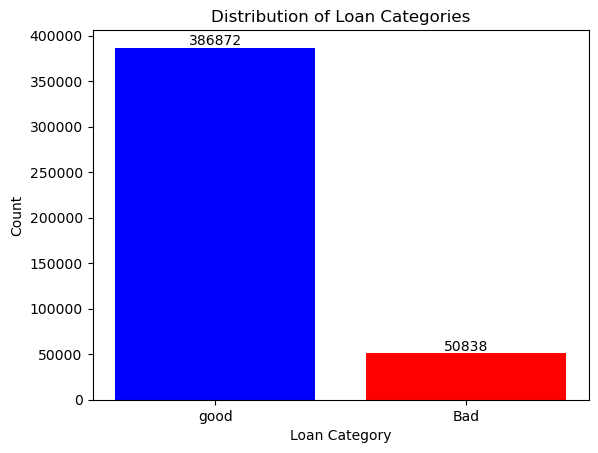

In [15]:
colors = ['blue', 'red']

plt.bar(loan_category_counts.index, loan_category_counts.values, color=colors)
plt.xlabel('Loan Category')
plt.ylabel('Count')
plt.title('Distribution of Loan Categories')

# Add values on top of the bars
for i, count in enumerate(loan_category_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)

plt.show()

## Add Datetime

In [16]:
df_cl['earliest_cr_line'].value_counts()

Oct-00    3498
Aug-00    3432
Aug-01    3304
Oct-99    3269
Oct-01    3195
          ... 
Sep-60       1
Jun-59       1
Nov-58       1
May-62       1
Nov-56       1
Name: earliest_cr_line, Length: 647, dtype: int64

In [17]:
# The most recent month LC pulled credit for this loan
df_cl['last_credit_pull_d'].value_counts()

Jan-16    308335
Dec-15     13166
Nov-15      7873
Sep-15      7593
Oct-15      7524
           ...  
Nov-07         3
Oct-07         2
May-08         1
Jun-08         1
Jul-08         1
Name: last_credit_pull_d, Length: 100, dtype: int64

In [18]:
# Last month payment was received
df_cl['last_pymnt_d'].value_counts()

Jan-16    168392
Dec-15     58027
Jul-15     11081
Oct-15     10581
Sep-15      9640
           ...  
Apr-08        18
Mar-08        13
Feb-08         6
Jan-08         6
Dec-07         1
Name: last_pymnt_d, Length: 98, dtype: int64

In [19]:
# The month which the loan was funded
df_cl['issue_d'].value_counts()

Oct-14    36651
Jul-14    28060
Nov-14    23610
May-14    18179
Apr-14    18019
          ...  
Oct-07       97
Aug-08       96
Sep-08       54
Sep-07       47
Aug-07       20
Name: issue_d, Length: 89, dtype: int64

In [20]:
def date_time(dt):
  if dt.year > 2016:
    dt = dt.replace(year=dt.year-100)
  return dt

In [21]:
# Set standard datetime
df_cl['earliest_cr_line'] = pd.to_datetime(df_cl['earliest_cr_line'], format='%b-%y') # The month the borrower's earliest reported credit line was opened
df_cl['earliest_cr_line'] = df_cl['earliest_cr_line'].apply(lambda x: date_time(x))
df_cl['issue_d'] = pd.to_datetime(df_cl['issue_d'], format='%b-%y') # The month which the loan was funded
df_cl['last_pymnt_d'] = pd.to_datetime(df_cl['last_pymnt_d'],format='%b-%y') # Last month payment was received
df_cl['last_credit_pull_d'] = pd.to_datetime(df_cl['last_credit_pull_d'],format='%b-%y') # The most recent month LC pulled credit for this loan
df_cl[['earliest_cr_line','issue_d','last_pymnt_d','last_credit_pull_d']].head(3)

,earliest_cr_line,issue_d,last_pymnt_d,last_credit_pull_d
1,1999-04-01,2011-12-01,2013-04-01,2013-09-01
3,1996-02-01,2011-12-01,2015-01-01,2015-01-01
4,1996-01-01,2011-12-01,2016-01-01,2016-01-01


### Create new feature from datetime columns

In [22]:
def diff_month(d1, d2):
    return (d1.year - d2.year) * 12 + d1.month - d2.month

In [23]:
def diff_year(d1, d2):
    return (d1.year - d2.year)

In [24]:
df_cl['pymnt_time'] = df_cl.apply(lambda x: diff_month(x.last_pymnt_d, x.issue_d), axis=1)
df_cl['credit_pull_year'] = df_cl.apply(lambda x: diff_year(x.last_credit_pull_d, x.earliest_cr_line), axis=1)
print('Adding features succeed')

Adding features succeed


In [25]:
df_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 437710 entries, 1 to 466283
Data columns (total 57 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Unnamed: 0                  437710 non-null  int64         
 1   id                          437710 non-null  int64         
 2   member_id                   437710 non-null  int64         
 3   loan_amnt                   437710 non-null  int64         
 4   funded_amnt                 437710 non-null  int64         
 5   funded_amnt_inv             437710 non-null  float64       
 6   term                        437710 non-null  object        
 7   int_rate                    437710 non-null  float64       
 8   installment                 437710 non-null  float64       
 9   grade                       437710 non-null  object        
 10  sub_grade                   437710 non-null  object        
 11  emp_title                   437710 non-

In [26]:
# Drop Unecessary Column
unused_col = ['policy_code', 'application_type', 'Unnamed: 0', 'pymnt_plan', 'next_pymnt_d','zip_code', 'title', 'emp_title','loan_status']

drop_data = df_cl[unused_col]

df_cl.drop(columns=unused_col, axis=1, inplace=True)

In [27]:
df_cl.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_category,pymnt_time,credit_pull_year
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,119.66,2013-09-01,0.0,0.0,0.0,81539.0,22800.0,Bad,16,14
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,357.48,2015-01-01,0.0,0.0,0.0,81539.0,22800.0,good,37,19
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,67.79,2016-01-01,0.0,0.0,0.0,81539.0,22800.0,good,49,20
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,...,161.03,2015-09-01,0.0,0.0,0.0,81539.0,22800.0,good,37,11
6,1069639,1304742,7000,7000,7000.0,60 months,15.96,170.08,C,C5,...,170.08,2016-01-01,0.0,0.0,0.0,81539.0,22800.0,good,49,11


In [28]:
print("Unique Features (Numerical)")
print(df_cl.select_dtypes(exclude='object').nunique())

Unique Features (Numerical)
id                            437710
member_id                     437710
loan_amnt                       1349
funded_amnt                     1351
funded_amnt_inv                 9373
int_rate                         503
installment                    54146
annual_inc                     28037
issue_d                           89
dti                             3997
delinq_2yrs                       24
earliest_cr_line                 647
inq_last_6mths                    27
open_acc                          61
pub_rec                           25
revol_bal                      57256
revol_util                      1260
total_acc                        112
out_prncp                     127760
out_prncp_inv                 132928
total_pymnt                   331844
total_pymnt_inv               328538
total_rec_prncp               162300
total_rec_int                 259383
total_rec_late_fee              5484
recoveries                     20963
collection

In [29]:
print("Unique Features (Categorical)")
print(df_cl.select_dtypes(exclude=['int','float']).nunique())

Unique Features (Categorical)
term                        2
grade                       7
sub_grade                  35
emp_length                 11
home_ownership              6
verification_status         3
issue_d                    89
url                    437710
purpose                    14
addr_state                 50
earliest_cr_line          647
initial_list_status         2
last_pymnt_d               98
last_credit_pull_d        100
loan_category               2
dtype: int64


In [30]:
df_cl.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'url',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'loan_category', 'pymnt_time',
       'credit_pull_year'],
      dtype='object')

In [31]:
df_cl.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
url                           0
purpose                       0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_py

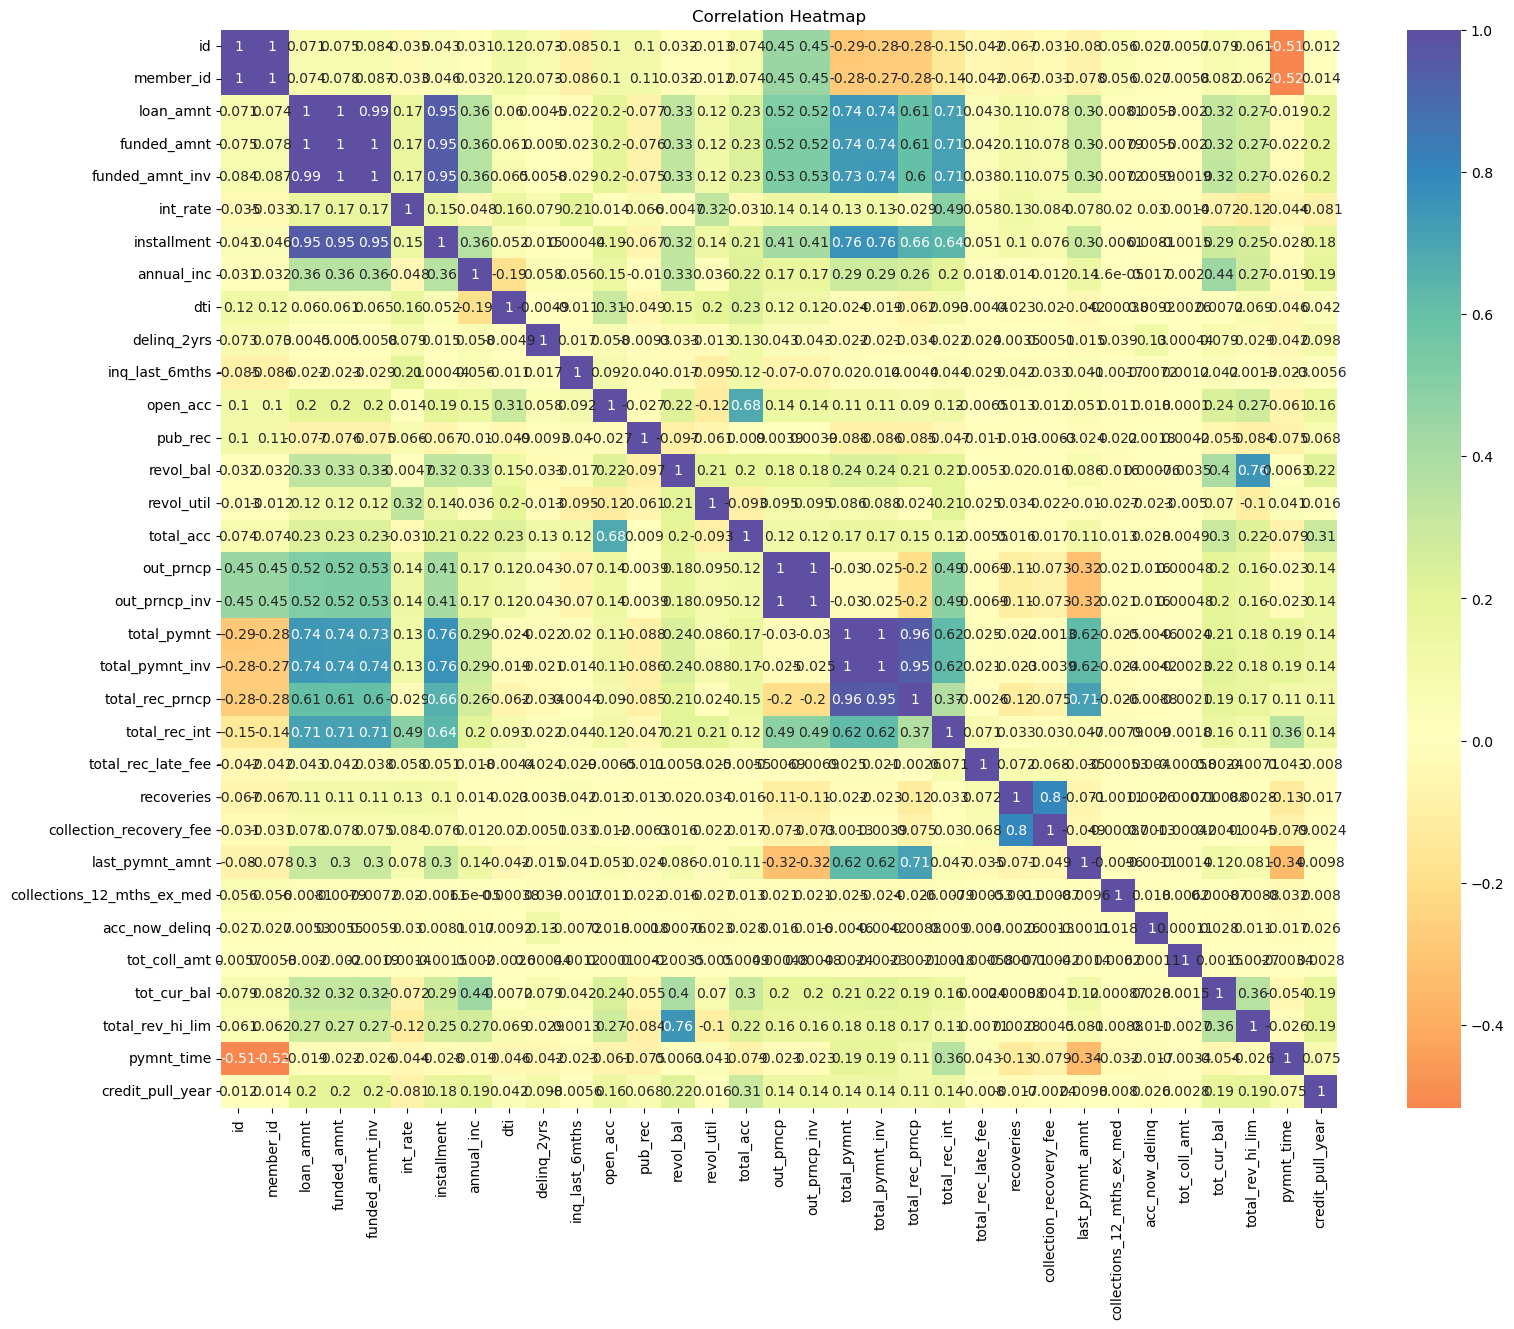

In [32]:
# Calculate the correlation matrix
correlation_matrix = df_cl.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(18, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='Spectral', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [33]:
df_cl[['loan_amnt', 'funded_amnt', 'funded_amnt_inv']].describe()

,loan_amnt,funded_amnt,funded_amnt_inv
count,437710.000000,437710.000000,437710.000000
mean,14442.772726,14417.439800,14348.784677
std,8278.528864,8267.103404,8290.345080
min,500.000000,500.000000,0.000000
25%,8000.000000,8000.000000,8000.000000
50%,12375.000000,12325.000000,12175.000000
75%,20000.000000,20000.000000,20000.000000
max,35000.000000,35000.000000,35000.000000


In [34]:
df_cl[['out_prncp', 'out_prncp_inv']].describe()

,out_prncp,out_prncp_inv
count,437710.000000,437710.000000
mean,4467.610808,4465.999738
std,6414.243196,6412.380883
min,0.000000,0.000000
25%,0.000000,0.000000
50%,406.845000,406.240000
75%,7528.712500,7522.295000
max,32160.380000,32160.380000


In [35]:
df_cl[['total_pymnt', 'total_pymnt_inv', 'total_rec_prncp']].describe()

,total_pymnt,total_pymnt_inv,total_rec_prncp
count,437710.000000,437710.000000,437710.000000
mean,11642.198795,11571.610431,8945.956324
std,8264.870915,8252.885476,7045.064875
min,33.730000,0.000000,0.000000
25%,5636.403971,5587.447500,3775.280000
50%,9538.280000,9472.560000,6943.815000
75%,15441.721595,15346.637500,12000.000000
max,57777.579870,57777.580000,35000.030000


In [36]:
unused_column = ['url','pub_rec', 'dti', 'revol_bal', 'total_acc','earliest_cr_line', 'last_credit_pull_d', 'sub_grade',
                 'initial_list_status','tot_coll_amt','tot_cur_bal', 'addr_state',  'issue_d',  
                 'last_pymnt_d', 'earliest_cr_line', 'last_credit_pull_d', 'installment',
                 'funded_amnt_inv', 'funded_amnt', 'id', 'member_id', 'out_prncp_inv', 'total_pymnt_inv', 'total_pymnt']
df_clean = df_cl.drop(columns = unused_column)

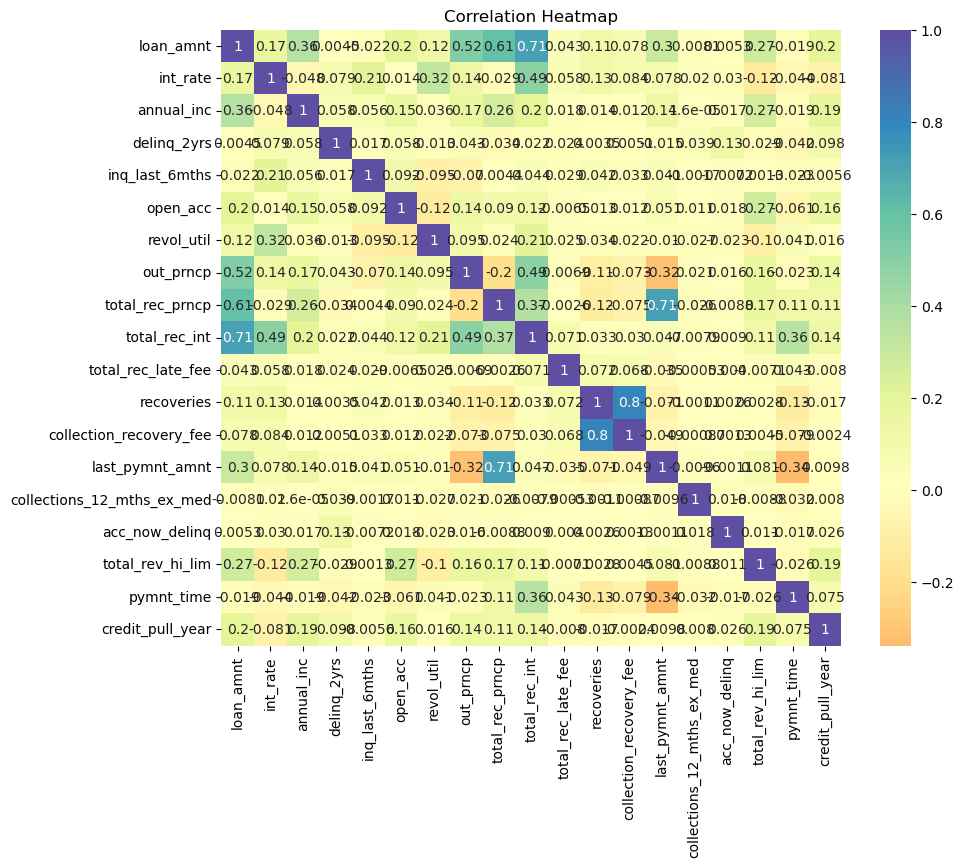

In [37]:
# Calculate the correlation matrix
correlation_matrix = df_clean.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Spectral', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [38]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 437710 entries, 1 to 466283
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   437710 non-null  int64  
 1   term                        437710 non-null  object 
 2   int_rate                    437710 non-null  float64
 3   grade                       437710 non-null  object 
 4   emp_length                  437710 non-null  object 
 5   home_ownership              437710 non-null  object 
 6   annual_inc                  437710 non-null  float64
 7   verification_status         437710 non-null  object 
 8   purpose                     437710 non-null  object 
 9   delinq_2yrs                 437710 non-null  float64
 10  inq_last_6mths              437710 non-null  float64
 11  open_acc                    437710 non-null  float64
 12  revol_util                  437710 non-null  float64
 13  out_prncp     

In [39]:
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,437710.0,14442.772726,8278.528864,500.00,8000.0000,12375.000,20000.0000,35000.00
int_rate,437710.0,13.823966,4.358294,5.42,10.9900,13.660,16.4900,26.06
annual_inc,437710.0,74126.158374,55172.403482,1896.00,45500.0000,64000.000,90000.0000,7500000.00
delinq_2yrs,437710.0,0.287058,0.800888,0.00,0.0000,0.000,0.0000,29.00
inq_last_6mths,437710.0,0.804076,1.089163,0.00,0.0000,0.000,1.0000,32.00
open_acc,437710.0,11.268893,4.999563,1.00,8.0000,10.000,14.0000,84.00
revol_util,437710.0,56.333232,23.683636,0.00,39.4000,57.800,74.9000,892.30
out_prncp,437710.0,4467.610808,6414.243196,0.00,0.0000,406.845,7528.7125,32160.38
total_rec_prncp,437710.0,8945.956324,7045.064875,0.00,3775.2800,6943.815,12000.0000,35000.03
total_rec_int,437710.0,2610.962616,2490.476579,0.00,971.6125,1841.065,3335.9300,24205.62


In [40]:
df_clean['term'] = df_clean['term'].apply(lambda x: int(x.split()[0]))
df_clean['term']

1         60
3         36
4         60
5         36
6         60
          ..
466279    36
466280    60
466281    60
466282    60
466283    36
Name: term, Length: 437710, dtype: int64

In [41]:
df_clean

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,delinq_2yrs,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,total_rev_hi_lim,loan_category,pymnt_time,credit_pull_year
1,2500,60,15.27,C,< 1 year,RENT,30000.0,Source Verified,car,0.0,...,0.00,117.08,1.11,119.66,0.0,0.0,22800.0,Bad,16,14
3,10000,36,13.49,C,10+ years,RENT,49200.0,Source Verified,other,0.0,...,16.97,0.00,0.00,357.48,0.0,0.0,22800.0,good,37,19
4,3000,60,12.69,B,1 year,RENT,80000.0,Source Verified,other,0.0,...,0.00,0.00,0.00,67.79,0.0,0.0,22800.0,good,49,20
5,5000,36,7.90,A,3 years,RENT,36000.0,Source Verified,wedding,0.0,...,0.00,0.00,0.00,161.03,0.0,0.0,22800.0,good,37,11
6,7000,60,15.96,C,8 years,RENT,47004.0,Not Verified,debt_consolidation,0.0,...,0.00,0.00,0.00,170.08,0.0,0.0,22800.0,good,49,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466279,15000,36,13.53,B,4 years,RENT,66000.0,Source Verified,credit_card,0.0,...,0.00,0.00,0.00,509.25,0.0,0.0,17600.0,good,24,17
466280,18400,60,14.47,C,4 years,MORTGAGE,110000.0,Source Verified,debt_consolidation,0.0,...,0.00,0.00,0.00,432.64,0.0,0.0,29900.0,good,24,13
466281,22000,60,19.97,D,10+ years,MORTGAGE,78000.0,Verified,debt_consolidation,0.0,...,0.00,0.00,0.00,17.50,0.0,0.0,39400.0,Bad,11,19
466282,20700,60,16.99,D,7 years,MORTGAGE,46000.0,Verified,debt_consolidation,0.0,...,0.00,0.00,0.00,514.34,0.0,0.0,13100.0,good,24,14


In [42]:
df_clean['emp_length'] = df_clean['emp_length'].str.extract('(\d+)').astype(int)
df_clean['emp_length']

1          1
3         10
4          1
5          3
6          8
          ..
466279     4
466280     4
466281    10
466282     7
466283     3
Name: emp_length, Length: 437710, dtype: int32

## Data Preprocessing

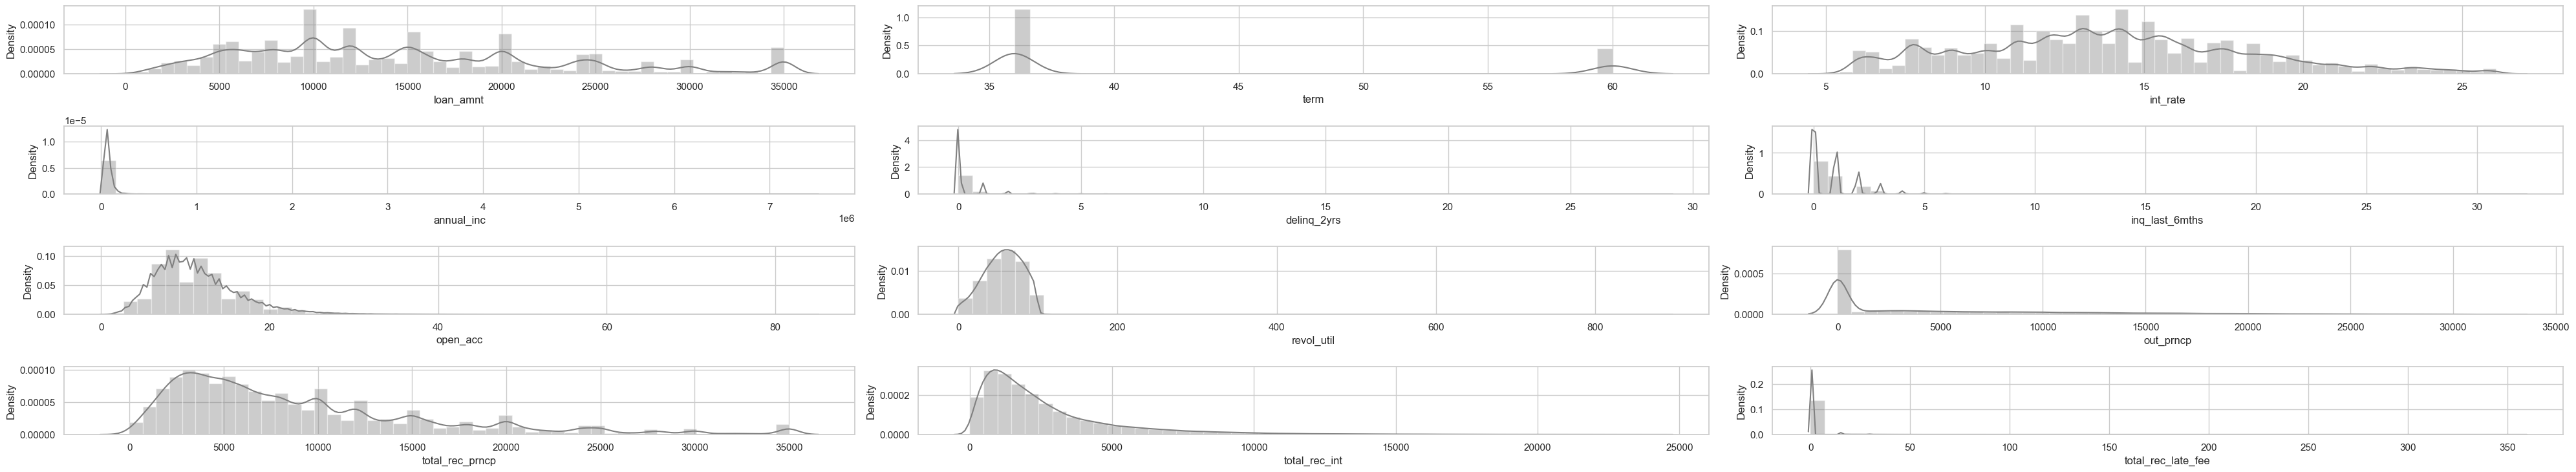

In [43]:
# Mengatur ukuran dan gaya plot
sns.set(style="whitegrid")

numeric_cols = df_clean.select_dtypes(include=[np.float64,np.int64])

plt.figure(figsize=(40, 20))
for i in range(0, 12):
    plt.subplot(11, 3, i+1)
    sns.distplot(numeric_cols.iloc[:,i], color='gray')
    plt.tight_layout()

### Check Outlier and Remove outlier

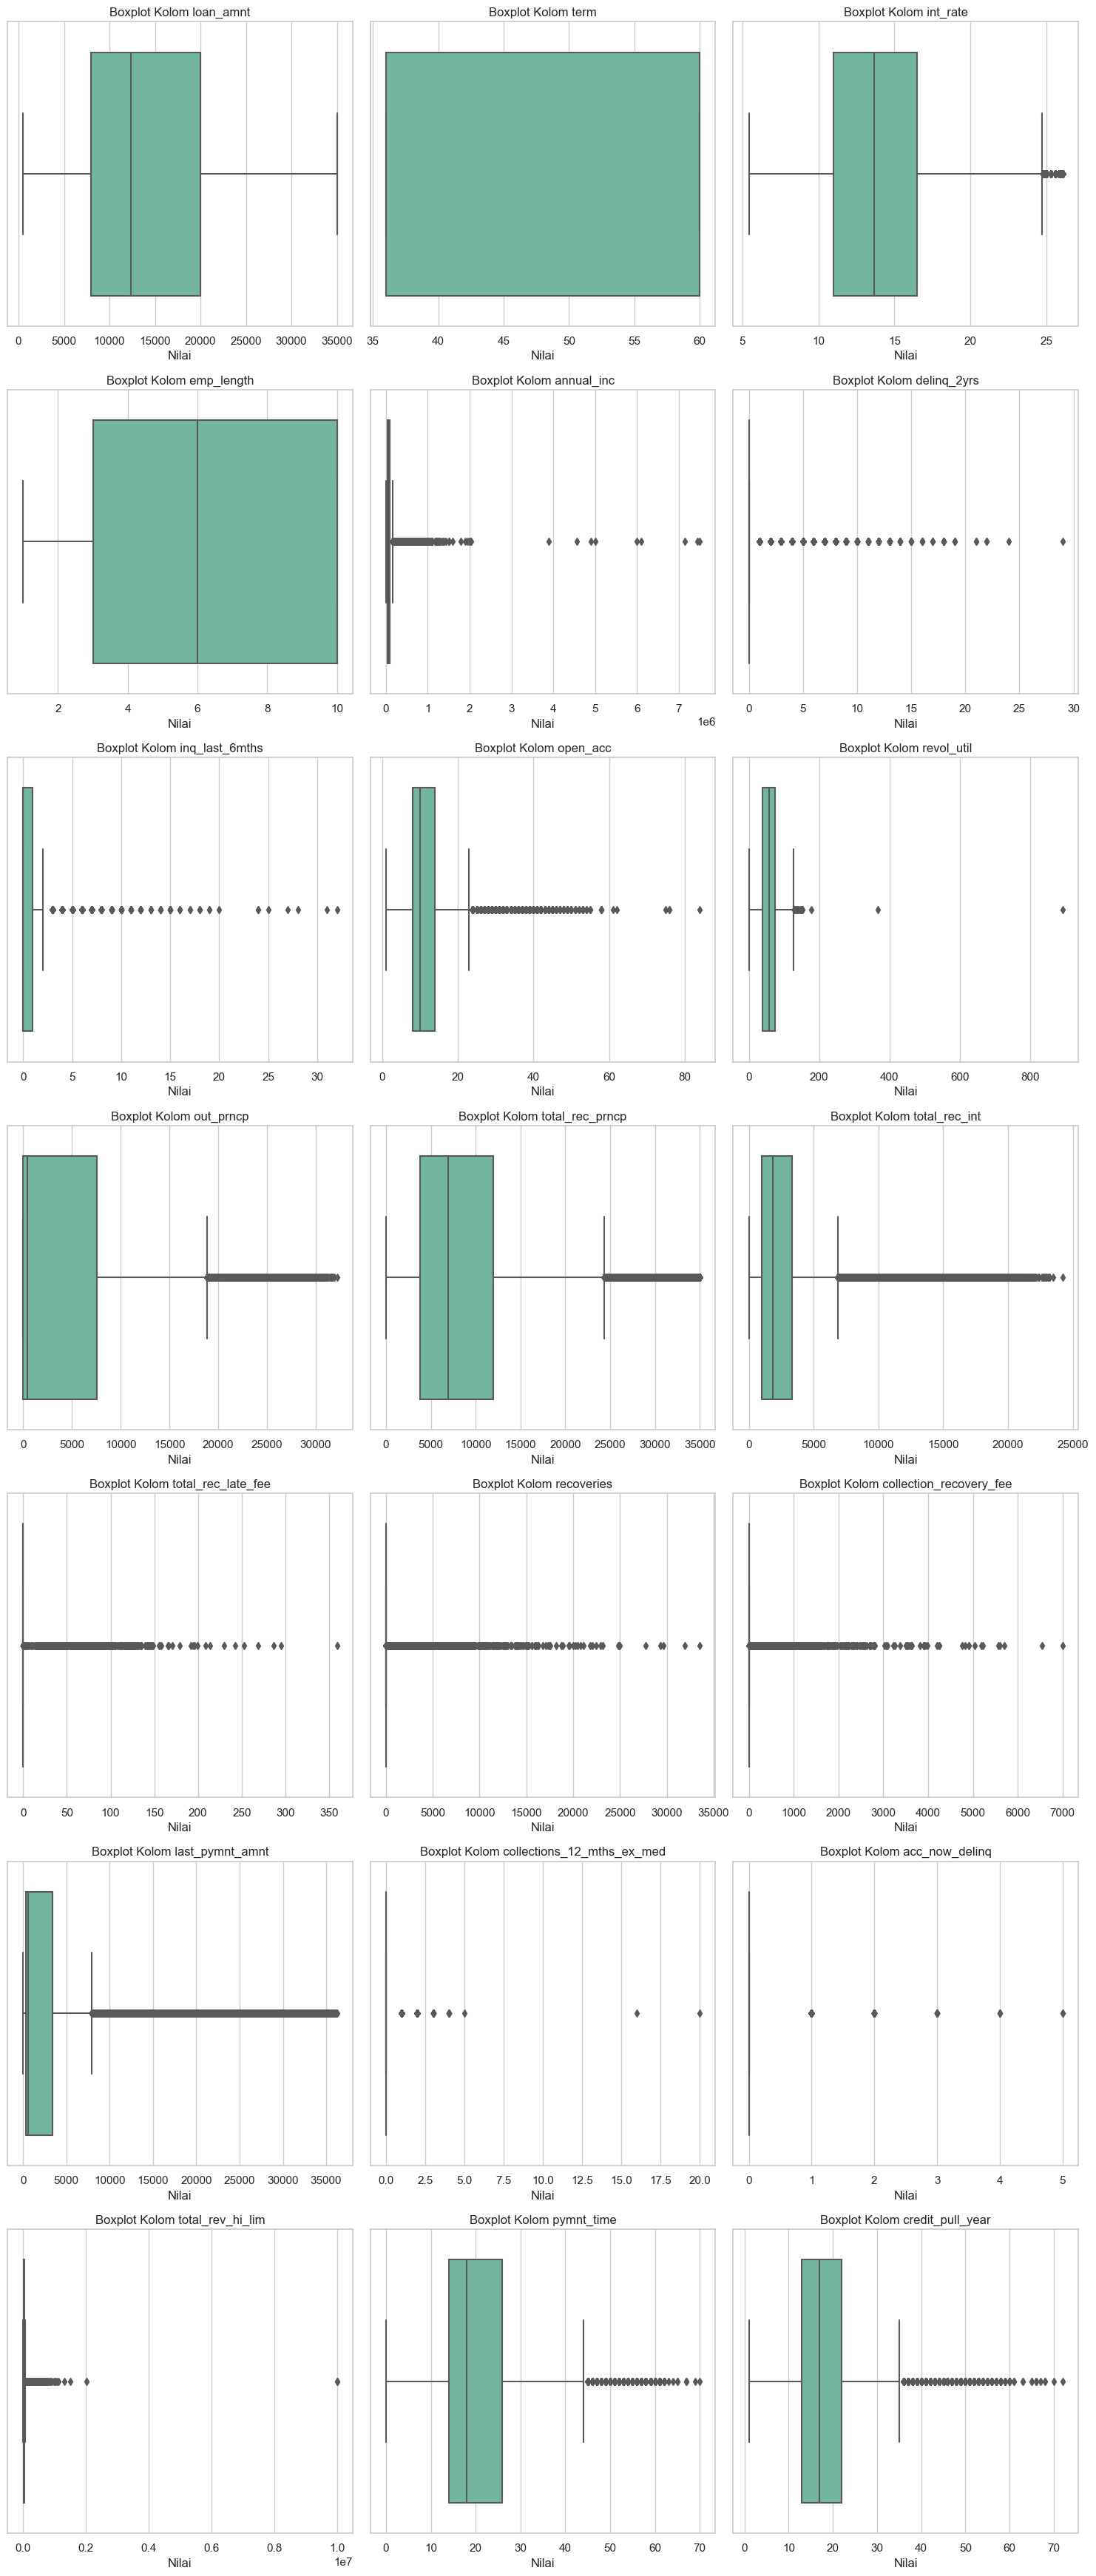

In [44]:
# Memilih hanya kolom-kolom dengan tipe data numerik
numerical_columns = df_clean.select_dtypes(include=['int', 'float']).columns

# Menghitung jumlah baris dan kolom subplots secara dinamis
num_cols = len(numerical_columns)
num_rows = (num_cols // 3) + (1 if num_cols % 3 > 0 else 0)  # Ubah angka 3 sesuai kebutuhan jumlah kolom dalam satu baris

# Memplot boxplot untuk setiap kolom numerik dalam DataFrame secara terpisah
plt.figure(figsize=(15, 5*num_rows))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 3, i)  # Ubah angka 3 sesuai dengan jumlah kolom dalam satu baris
    sns.boxplot(x=df_clean[column], orient="v", palette="Set2")
    plt.title(f'Boxplot Kolom {column}')
    plt.xlabel('Nilai')
plt.tight_layout()
plt.show()

In [45]:
def subset_by_iqr(df, column):
    whisker_width=1.5
    # Calculate Q1, Q2 and IQR
    q1 = df_clean[column].quantile(0.25)                 
    q3 = df_clean[column].quantile(0.75)
    iqr = q3 - q1
    # Apply filter with respect to IQR, including optional whiskers
    filter = (df_clean[column] >= q1 - whisker_width*iqr) & (df_clean[column] <= q3 + whisker_width*iqr)
    return df.loc[filter].reset_index(drop=True)

In [46]:
df_clean['int_rate'].unique()

array([15.27, 13.49, 12.69,  7.9 , 15.96, 18.64, 14.65,  9.91, 10.65,
       16.29,  6.03, 11.71, 12.42, 16.77,  8.9 ,  7.51,  6.62, 19.91,
       17.27, 14.27, 21.28, 17.58, 21.67, 19.42, 22.06, 20.89, 18.25,
       20.3 , 23.91, 19.03, 23.52, 23.13, 22.74, 22.35, 24.11,  6.  ,
       22.11,  7.49, 11.99,  5.99, 10.99,  9.99, 18.79, 11.49, 15.99,
       16.49,  6.99, 12.99, 15.23, 14.79,  8.49,  5.42, 17.49, 10.59,
       15.62, 21.36, 19.29, 13.99, 18.39, 16.89, 17.99, 20.62, 20.99,
       22.85, 19.69, 20.25, 23.22, 21.74, 22.48, 23.59, 12.62, 18.07,
       11.63,  7.91,  7.42, 11.14, 20.2 , 12.12, 19.39, 16.11, 17.54,
       16.59, 17.19, 12.87, 20.69,  9.67, 21.82, 19.79, 18.49, 13.84,
       22.94, 24.4 , 21.48, 14.82, 17.88, 20.11, 16.02, 17.51, 13.06,
       14.91, 15.28, 17.14, 13.43, 11.11, 10.37, 14.17, 16.4 , 15.65,
        7.66, 10.  , 10.74,  7.29,  5.79,  6.92,  9.63, 14.54, 12.68,
       18.62, 19.36, 13.8 , 18.99, 21.59, 20.85, 21.22, 19.74, 20.48,
        6.91, 12.23,

In [47]:
df_clean['annual_inc'].unique()

array([ 30000.,  49200.,  80000., ..., 113926.,  72787.,  57231.])

In [48]:
df_clean['open_acc'].unique()

array([ 3., 10., 15.,  9.,  7.,  4.,  2., 14., 12., 11., 20.,  8.,  6.,
       17.,  5., 13., 16., 30., 21., 18., 19., 27., 23., 34., 25., 22.,
       24., 26., 32., 28., 29., 33., 31., 39., 36., 38., 44., 35., 41.,
       42.,  1., 46., 37., 47., 40., 45., 49., 53., 51., 43., 62., 48.,
       50., 52., 54., 76., 58., 55., 84., 75., 61.])

In [49]:
df_clean['total_rec_late_fee'].unique()

array([ 0.  , 16.97, 15.  , ..., 35.67, 37.43, 41.15])

In [50]:
df_clean['credit_pull_year'].unique()

array([14, 19, 20, 11,  7,  9, 17, 24,  8, 13, 23, 21, 12, 18, 33, 31, 10,
       32, 34, 16, 15,  6, 22, 25, 29, 28, 26, 36, 27, 43, 30,  5, 38,  4,
       44, 35, 45, 39, 37, 40, 47, 41, 48, 49, 46,  3, 42, 51, 50, 52, 60,
       68, 61, 54, 53,  2,  1, 55, 56, 59, 63, 57, 66, 58, 70, 65, 67, 72],
      dtype=int64)

In [51]:
df_clean['last_pymnt_amnt'].unique()

array([ 119.66,  357.48,   67.79, ..., 5501.6 ,   17.5 , 1500.68])

In [52]:
df_clean['pymnt_time'].unique()

array([16, 37, 49, 11, 18, 21,  7, 22, 17, 38, 44, 10,  9, 12, 36, 20, 23,
       25, 28, 32, 34,  8, 31, 19, 40, 26, 33,  6, 14, 15, 29, 39, 13, 24,
       30,  2, 27,  4, 45, 47, 48,  1, 46, 35,  3,  5, 42, 41, 43, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 64, 65, 67, 63, 69, 70,
        0], dtype=int64)

In [53]:
outlier = ['annual_inc', 'open_acc', 'total_rec_late_fee', 'credit_pull_year', 'last_pymnt_amnt', 'pymnt_time']

print(f'Count of rows before removing outlier: {len(df_clean)}')
for i in outlier:
  df_cred_a_out = subset_by_iqr(df_clean, i) 
print(f'Count of rows after removing outlier: {len(df_cred_a_out)}')

Count of rows before removing outlier: 437710
Count of rows after removing outlier: 432876


### Splitting data

In [54]:
x = df_clean.drop(columns=['loan_category'])
y = df_clean['loan_category']

In [55]:
x_encoded = pd.get_dummies(x)

In [56]:
x_encoded.columns

Index(['loan_amnt', 'term', 'int_rate', 'emp_length', 'annual_inc',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'revol_util', 'out_prncp',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'total_rev_hi_lim',
       'pymnt_time', 'credit_pull_year', 'grade_A', 'grade_B', 'grade_C',
       'grade_D', 'grade_E', 'grade_F', 'grade_G', 'home_ownership_ANY',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', '

In [57]:
y = y.replace({"good":0, "Bad":1})

In [58]:
y

1         1
3         0
4         0
5         0
6         0
         ..
466279    0
466280    0
466281    1
466282    0
466283    0
Name: loan_category, Length: 437710, dtype: int64

In [59]:
from collections import Counter
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.2, random_state=1)
print('Class from training data df_train',Counter(y_train))

print('Class from testing data df_test',Counter(y_test))

Class from training data df_train Counter({0: 309406, 1: 40762})
Class from testing data df_test Counter({0: 77466, 1: 10076})


In [60]:
X_train.columns

Index(['loan_amnt', 'term', 'int_rate', 'emp_length', 'annual_inc',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'revol_util', 'out_prncp',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'total_rev_hi_lim',
       'pymnt_time', 'credit_pull_year', 'grade_A', 'grade_B', 'grade_C',
       'grade_D', 'grade_E', 'grade_F', 'grade_G', 'home_ownership_ANY',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', '

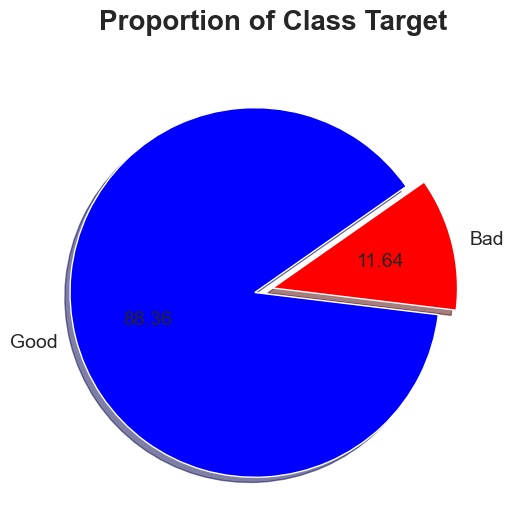

In [61]:
# Distribution of training target
plt.figure(figsize=(6,6))
plt.pie(
        y_train.value_counts(),
        autopct='%.2f',
        explode=[0.1,0],
        labels=["Good","Bad"], 
        shadow=True, 
        textprops={'fontsize': 14},
        colors=["blue","red"], 
        startangle=35)

plt.title("Proportion of Class Target",fontsize=20, fontweight='bold', pad=20)
plt.show()

# EDA

## How about classifying grade towards our borrower and the loan status?

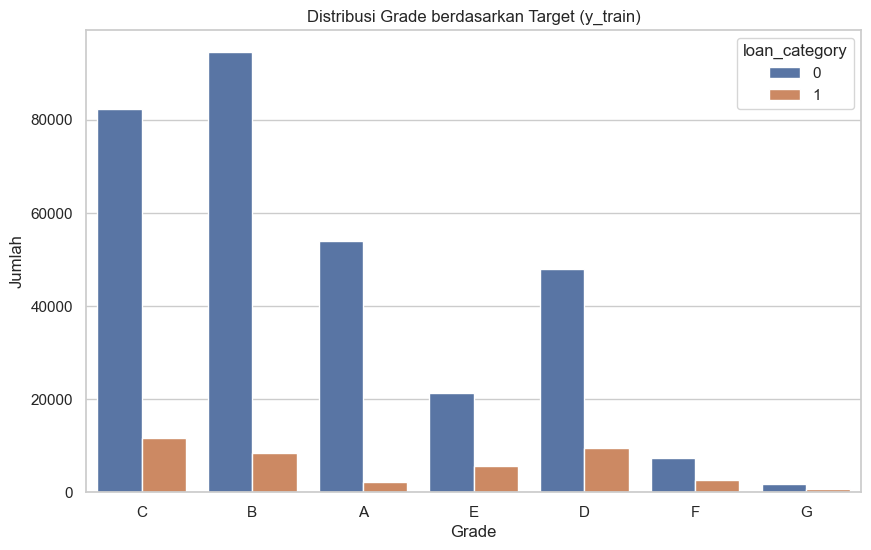

In [62]:
X_train['grade'] = X_train[['grade_A', 'grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G']].idxmax(axis=1)

grade_mapping = {'grade_A': 'A', 'grade_B': 'B', 'grade_C': 'C', 'grade_D': 'D', 'grade_E': 'E', 'grade_F': 'F', 'grade_G': 'G'}
X_train['grade'] = X_train['grade'].map(grade_mapping)

plt.figure(figsize=(10, 6))
sns.countplot(x='grade', hue=y_train, data=X_train)
plt.title("Distribusi Grade berdasarkan Target (y_train)")
plt.xlabel("Grade")
plt.ylabel("Jumlah")
plt.show()

For Good loans the highest is Grade B and the lowest is Grade G, for Bad loans the highest is Grade C and the lowest is Grade G 

### what about borrowers who default and are able to pay based on grade?

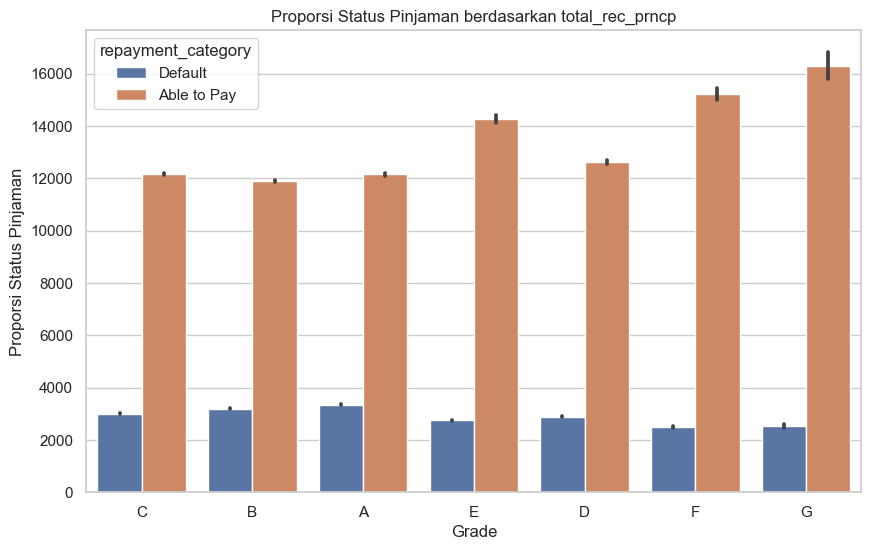

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

X_train['repayment_category'] = pd.cut(X_train['total_rec_prncp'], bins=[-np.inf, 5000, np.inf], labels=['Default', 'Able to Pay'])

plt.figure(figsize=(10, 6))
sns.barplot(x='grade', y='total_rec_prncp', hue='repayment_category', data=X_train, estimator=lambda x: sum(x) / len(x))
plt.title("Proporsi Status Pinjaman berdasarkan total_rec_prncp")
plt.xlabel("Grade")
plt.ylabel("Proporsi Status Pinjaman")
plt.show()


For borrowers with a score of 0 – 5000 it is a default, while those above 5000 are able to pay 

## What can be concluded from good or bad loans based on their number of payments on the loan (term)?

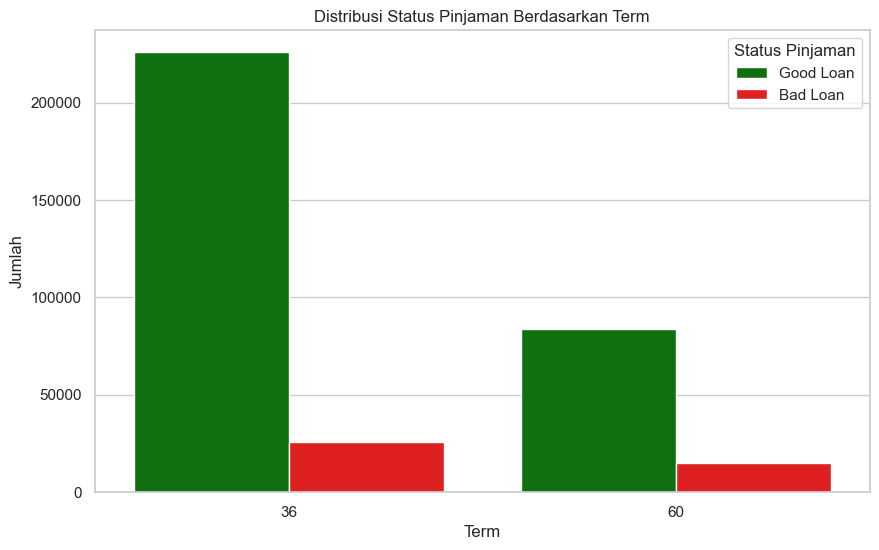

In [64]:
# Plot distribusi status pinjaman berdasarkan term
plt.figure(figsize=(10, 6))
sns.countplot(x='term', hue=y_train, data=X_train, palette=['green', 'red'])
plt.title("Distribusi Status Pinjaman Berdasarkan Term")
plt.xlabel("Term")
plt.ylabel("Jumlah")
plt.legend(title='Status Pinjaman', labels=['Good Loan', 'Bad Loan'])
plt.show()

Good Loans are dominated by the 36 month label, as is the case with Bad Loans 

### Does the employment length have an impact to good or bad loan?

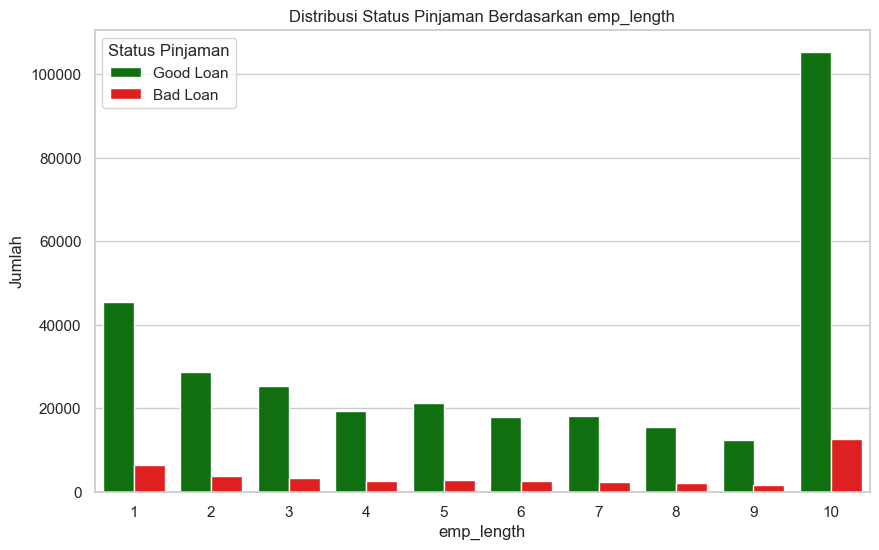

In [65]:
# Plot distribusi status pinjaman berdasarkan term
plt.figure(figsize=(10, 6))
sns.countplot(x='emp_length', hue=y_train, data=X_train, palette=['green', 'red'])
plt.title("Distribusi Status Pinjaman Berdasarkan emp_length")
plt.xlabel("emp_length")
plt.ylabel("Jumlah")
plt.legend(title='Status Pinjaman', labels=['Good Loan', 'Bad Loan'])
plt.show()

Yes, Good Loan and Bad Loan are dominated by 10+ year labels 

### what is the purpose of the borrower borrowing money?

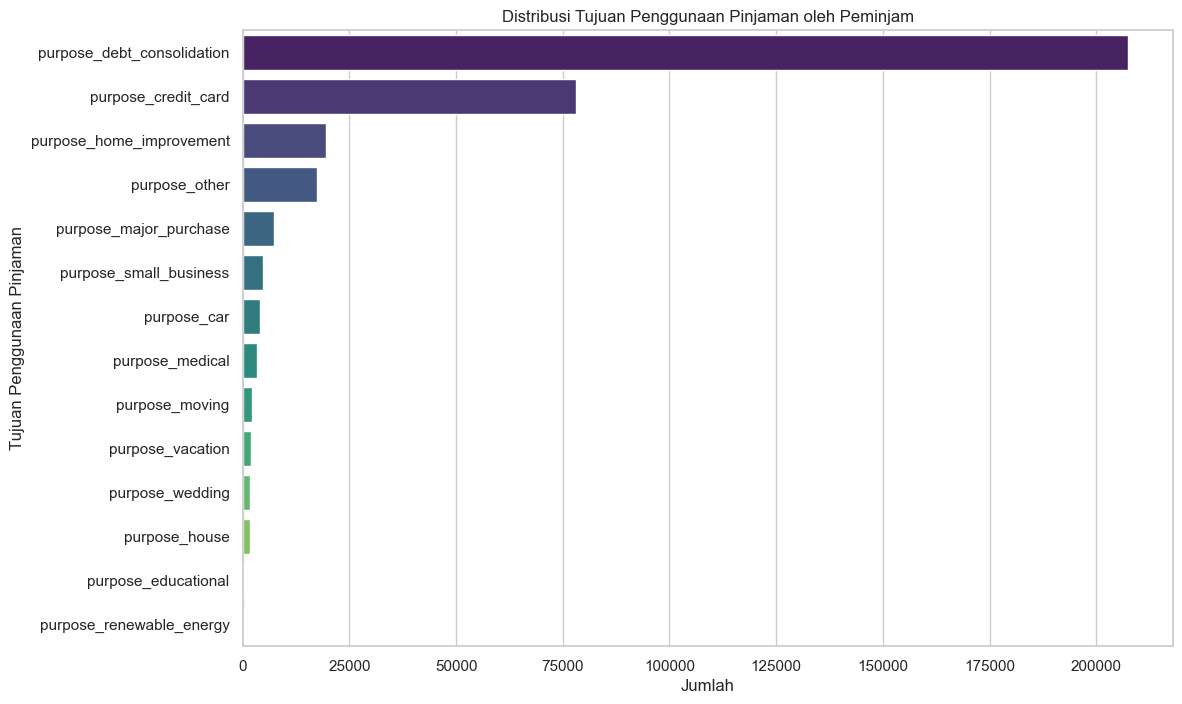

In [66]:
X_train['purpose'] = X_train[['purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding']].idxmax(axis=1)

# Plot distribusi tujuan penggunaan pinjaman
plt.figure(figsize=(12, 8))
sns.countplot(y='purpose', data=X_train, order=X_train['purpose'].value_counts().index, palette='viridis')
plt.title("Distribusi Tujuan Penggunaan Pinjaman oleh Peminjam")
plt.xlabel("Jumlah")
plt.ylabel("Tujuan Penggunaan Pinjaman")
plt.show()

Borrowers borrow money for various reasons, the most common reason being debt consolidation, then continuing with credit cards, and finally renewable energy. 

In [67]:
X_train = X_train.drop(columns=["grade", "purpose", "repayment_category"], axis=1)

In [68]:
X_train.columns

Index(['loan_amnt', 'term', 'int_rate', 'emp_length', 'annual_inc',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'revol_util', 'out_prncp',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'total_rev_hi_lim',
       'pymnt_time', 'credit_pull_year', 'grade_A', 'grade_B', 'grade_C',
       'grade_D', 'grade_E', 'grade_F', 'grade_G', 'home_ownership_ANY',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', '

# Modelling

### Function to evaluation model

In [111]:
#Function Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

def eval_classification(model,  y_train_pred, y_test_pred, y_train, y_test):
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_train_pred))
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_test_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_train_pred, zero_division=0))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_test_pred, zero_division=0))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_train_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_test_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_train_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_test_pred))
    
    fpr, tpr, thresholds = roc_curve(y_train, y_train_pred, pos_label=1) 
    print("AUC (Train Set): %.2f" % auc(fpr, tpr))
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1) 
    print("AUC (Test Set): %.2f" % auc(fpr, tpr))

### Model using imbalance data

In [112]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train,y_train)

y_train_pred = dt.predict(X_train)
y_pred = dt.predict(X_test)

eval_classification(dt, y_train_pred, y_pred, y_train, y_test)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.95
Precision (Train Set): 1.00
Precision (Test Set): 0.79
Recall (Train Set): 1.00
Recall (Test Set): 0.82
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.80
AUC (Train Set): 1.00
AUC (Test Set): 0.89


In [113]:
rf = RandomForestClassifier(random_state=1, n_estimators = 100)
rf.fit(X_train,y_train)

y_train_pred = rf.predict(X_train)
y_pred = rf.predict(X_test)

eval_classification(rf, y_train_pred, y_pred, y_train, y_test)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.97
Precision (Train Set): 1.00
Precision (Test Set): 0.99
Recall (Train Set): 1.00
Recall (Test Set): 0.77
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.87
AUC (Train Set): 1.00
AUC (Test Set): 0.89


### Hyperparameter Tuning using imbalance data

In [114]:
hyperparameters = dict(max_depth=[5,10,25,50], 
                       min_samples_split=[5,10,25,50,100], 
                       min_samples_leaf=[25,50,100,125],
                       max_features=['auto','sqrt','log2']
                    )

dt = DecisionTreeClassifier(random_state=1)
dt_tuned = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=1, scoring='accuracy')
dt_tuned.fit(X_train, y_train)

y_train_pred = dt_tuned.predict(X_train)
y_pred = dt_tuned.predict(X_test)

eval_classification(dt_tuned, y_train_pred, y_pred, y_train, y_test)

Accuracy (Train Set): 0.95
Accuracy (Test Set): 0.95
Precision (Train Set): 0.91
Precision (Test Set): 0.90
Recall (Train Set): 0.66
Recall (Test Set): 0.65
F1-Score (Train Set): 0.77
F1-Score (Test Set): 0.75
AUC (Train Set): 0.83
AUC (Test Set): 0.82


In [115]:
hyperparameters = dict(
                       max_depth=[10, 20, 30], 
                       min_samples_split=[20, 30, 50], 
                       min_samples_leaf=[50,100,125],
                       max_features = ['auto', 'sqrt'])

rf = RandomForestClassifier(random_state=1)
rf_tuned = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=1, scoring='accuracy')
rf_tuned.fit(X_train,y_train)

y_train_pred = rf_tuned.predict(X_train)
y_pred = rf_tuned.predict(X_test)

eval_classification(rf_tuned, y_train_pred, y_pred, y_train, y_test)

Accuracy (Train Set): 0.97
Accuracy (Test Set): 0.97
Precision (Train Set): 1.00
Precision (Test Set): 0.99
Recall (Train Set): 0.75
Recall (Test Set): 0.73
F1-Score (Train Set): 0.85
F1-Score (Test Set): 0.84
AUC (Train Set): 0.87
AUC (Test Set): 0.86


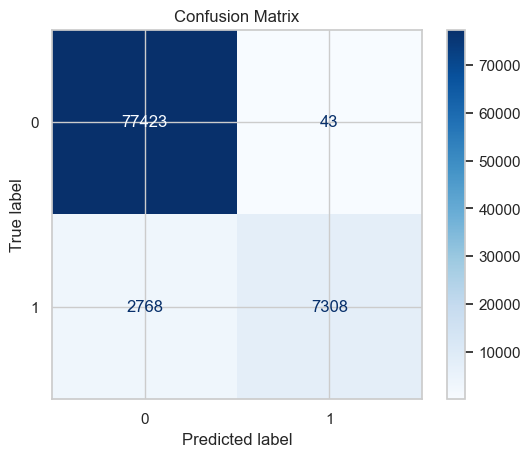

In [116]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)  
plt.title('Confusion Matrix')
plt.show()

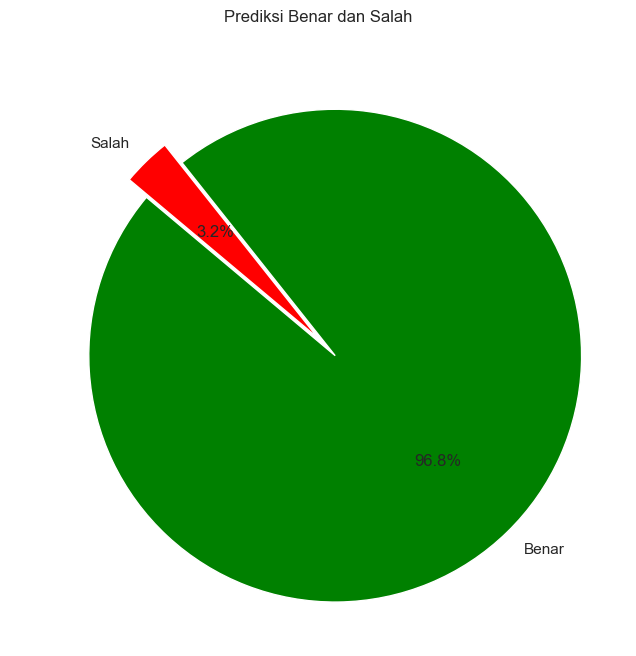

In [117]:
# Hitung prediksi benar dan salah
correct = sum(y_test == y_pred)
incorrect = sum(y_test != y_pred)


labels = ['Benar', 'Salah']
sizes = [correct, incorrect]
colors = ['green', 'red'] 
explode = (0.1, 0)

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', explode=explode, startangle=140)
plt.title('Prediksi Benar dan Salah')
plt.show()

In [118]:
def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

In [119]:
show_best_hyperparameter(rf_tuned.best_estimator_, hyperparameters)

Best max_depth: 30
Best min_samples_split: 50
Best min_samples_leaf: 50
Best max_features: sqrt


In [120]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.best_estimator_.feature_importances_, index=X_train.columns)
    ax = feat_importances.nlargest(10).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()
    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

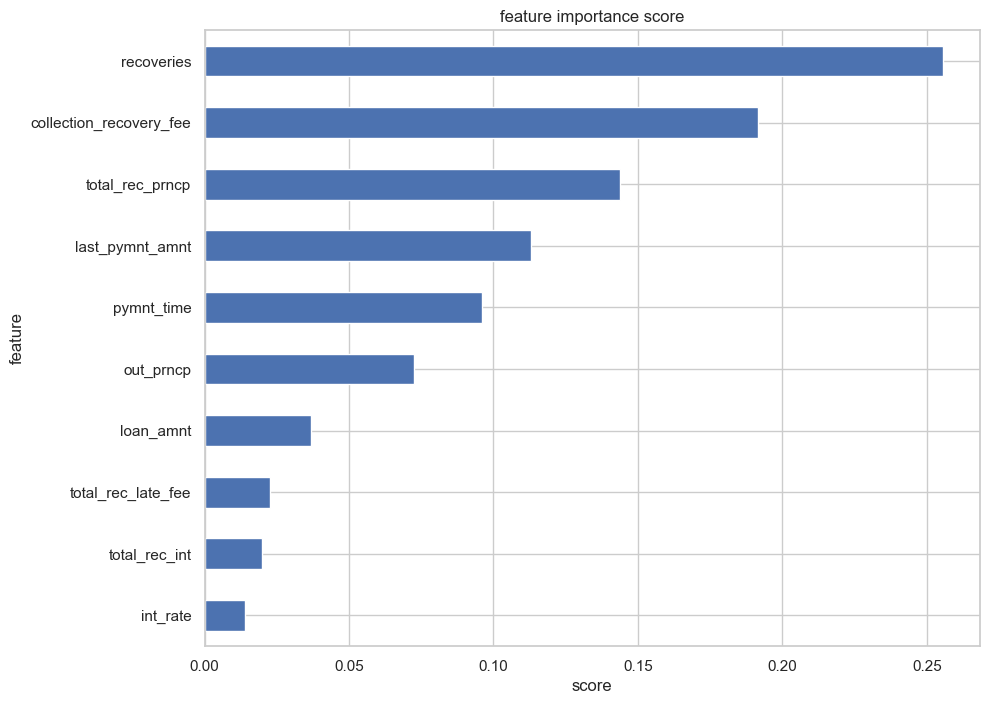

In [121]:
show_feature_importance(rf_tuned)

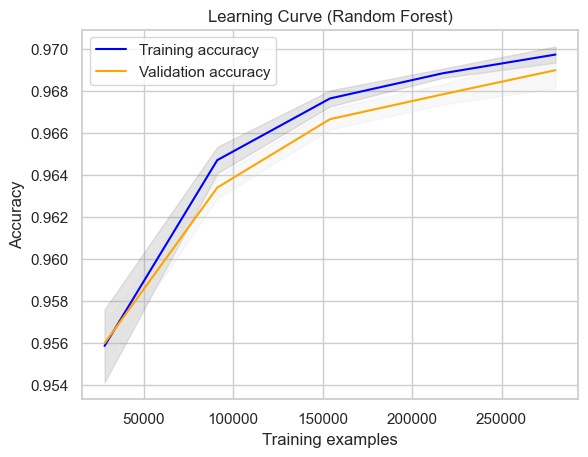

In [122]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Define the range of training set sizes for the learning curve
train_sizes = np.linspace(0.1, 1.0, 5)

# Compute learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    rf_tuned.best_estimator_,
    X_train,
    y_train,
    cv=5,  # Number of cross-validation splits
    train_sizes=train_sizes,
    scoring='accuracy'  # Measure accuracy
)

# Compute mean and standard deviation of the scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure()
plt.title("Learning Curve (Random Forest)")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")

# Plot the mean and standard deviation of training and testing scores
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, color="gray", alpha=0.2)
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, color="gainsboro", alpha=0.2)

plt.plot(train_sizes, train_scores_mean, label="Training accuracy", color="blue")
plt.plot(train_sizes, test_scores_mean, label="Validation accuracy", color="orange")

plt.legend(loc="best")
plt.show()

1. Achieves high accuracy rates on both training and testing data, indicating the model's proficiency in classifying the majority class "good".
2. High precision suggests minimal errors in classifying the positive class ("good").
3. However, the low recall on the minority class "bad" indicates the model's insensitivity in identifying important cases.
4. With a learning curve showing consistent improvement, the model seems to avoid overfitting but remains less effective in handling minority classes.

### Model using resampled data

In [142]:
from imblearn.over_sampling import SMOTE

oversampler = SMOTE(random_state=1)
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

# Mengganti struktur dataframe dengan data train yang telah di-oversampling
X_resampled = pd.DataFrame(X_resampled, columns=X_train.columns)

In [143]:
X_resampled.shape, X_train.shape, y_resampled.shape, y_train.shape

((618812, 51), (350168, 51), (618812,), (350168,))

In [144]:
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier(random_state=1)
dt1.fit(X_resampled,y_resampled)

y_train_pred = dt1.predict(X_resampled)
y_pred = dt1.predict(X_test)

eval_classification(dt1, y_train_pred, y_pred, y_resampled, y_test)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.95
Precision (Train Set): 1.00
Precision (Test Set): 0.77
Recall (Train Set): 1.00
Recall (Test Set): 0.81
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.79
AUC (Train Set): 1.00
AUC (Test Set): 0.89


In [145]:
rf = RandomForestClassifier(random_state=1, n_estimators = 100)
rf.fit(X_resampled,y_resampled)

y_train_pred = rf.predict(X_resampled)
y_pred = rf.predict(X_test)

eval_classification(rf, y_train_pred, y_pred, y_resampled, y_test)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.97
Precision (Train Set): 1.00
Precision (Test Set): 0.97
Recall (Train Set): 1.00
Recall (Test Set): 0.78
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.86
AUC (Train Set): 1.00
AUC (Test Set): 0.89


### Hyperparameter Tuning using resampled data

In [146]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

hyperparameters = dict(max_depth=[5,10,25,50], 
                       min_samples_split=[5,10,25,50,100], 
                       min_samples_leaf=[25,50,100,125],
                       max_features=['auto','sqrt','log2']
                    )

dt = DecisionTreeClassifier(random_state=1)
dt_tuned = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=1, scoring='accuracy')
dt_tuned.fit(X_resampled, y_resampled)

y_train_pred = dt_tuned.predict(X_resampled)
y_pred = dt_tuned.predict(X_test)

eval_classification(dt_tuned, y_train_pred, y_pred, y_resampled, y_test)

Accuracy (Train Set): 0.95
Accuracy (Test Set): 0.94
Precision (Train Set): 0.97
Precision (Test Set): 0.74
Recall (Train Set): 0.92
Recall (Test Set): 0.72
F1-Score (Train Set): 0.94
F1-Score (Test Set): 0.73
AUC (Train Set): 0.95
AUC (Test Set): 0.84


In [147]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
hyperparameters = dict(
                       max_depth=[10, 20, 30], 
                       min_samples_split=[20, 30, 50], 
                       min_samples_leaf=[50,100,125],
                       max_features = ['auto', 'sqrt'])

rf = RandomForestClassifier(random_state=1)
rf_tuned = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=1, scoring='accuracy')
rf_tuned.fit(X_resampled,y_resampled)

y_train_pred = rf_tuned.predict(X_resampled)
y_pred = rf_tuned.predict(X_test)

eval_classification(rf_tuned, y_train_pred, y_pred, y_resampled, y_test)

Accuracy (Train Set): 0.98
Accuracy (Test Set): 0.97
Precision (Train Set): 1.00
Precision (Test Set): 0.95
Recall (Train Set): 0.96
Recall (Test Set): 0.76
F1-Score (Train Set): 0.98
F1-Score (Test Set): 0.84
AUC (Train Set): 0.98
AUC (Test Set): 0.88


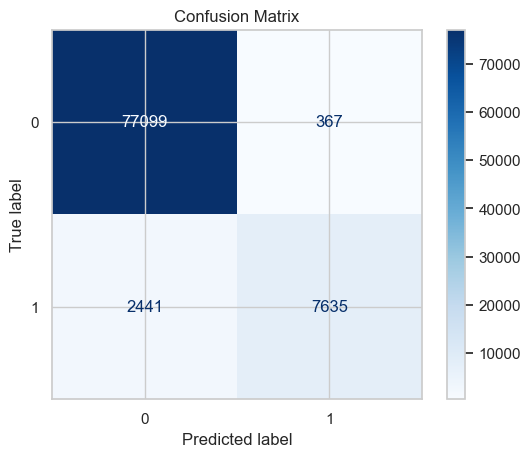

In [148]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)  
plt.title('Confusion Matrix')
plt.show()

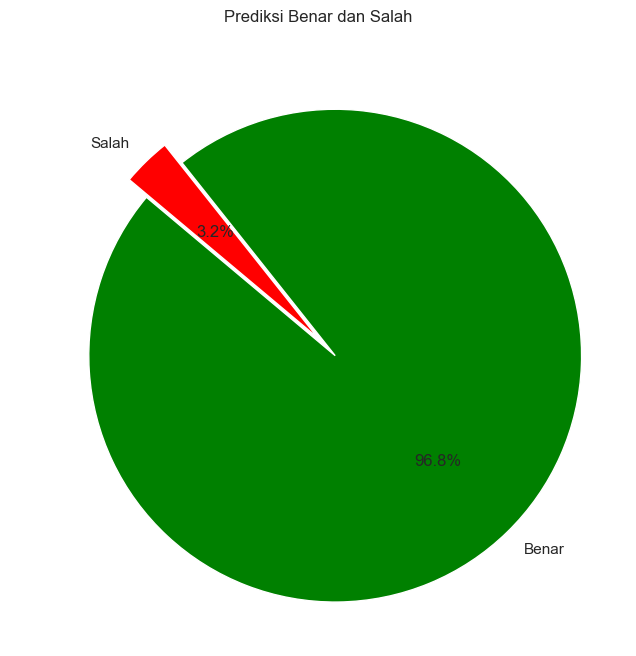

In [149]:
correct = sum(y_test == y_pred)
incorrect = sum(y_test != y_pred)

labels = ['Benar', 'Salah']
sizes = [correct, incorrect]
colors = ['green', 'red'] 
explode = (0.1, 0)

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', explode=explode, startangle=140)
plt.title('Prediksi Benar dan Salah')
plt.show()

In [150]:
def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

In [151]:
show_best_hyperparameter(rf_tuned.best_estimator_, hyperparameters)

Best max_depth: 30
Best min_samples_split: 50
Best min_samples_leaf: 50
Best max_features: sqrt


In [152]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.best_estimator_.feature_importances_, index=X_resampled.columns)
    ax = feat_importances.nlargest(10).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()
    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

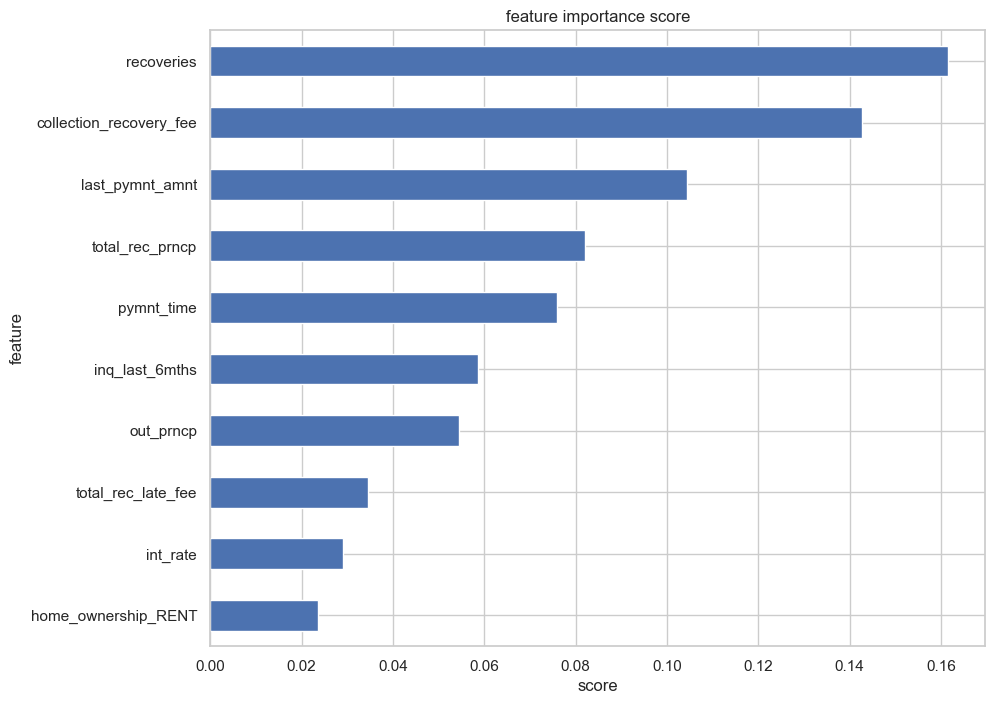

In [153]:
show_feature_importance(rf_tuned)

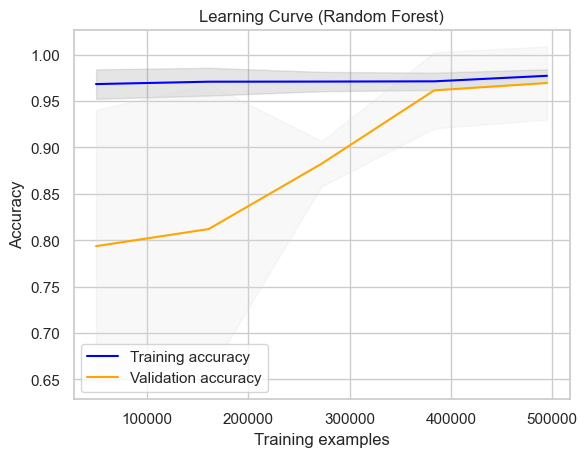

In [154]:
# Define the range of training set sizes for the learning curve
train_sizes = np.linspace(0.1, 1.0, 5)

# Compute learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    rf_tuned.best_estimator_,
    X_resampled,
    y_resampled,
    cv=5,  # Number of cross-validation splits
    train_sizes=train_sizes,
    scoring='accuracy'  # Measure accuracy
)

# Compute mean and standard deviation of the scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure()
plt.title("Learning Curve (Random Forest)")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")

# Plot the mean and standard deviation of training and testing scores
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, color="gray", alpha=0.2)
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, color="gainsboro", alpha=0.2)

plt.plot(train_sizes, train_scores_mean, label="Training accuracy", color="blue")
plt.plot(train_sizes, test_scores_mean, label="Validation accuracy", color="orange")

plt.legend(loc="best")
plt.show()

1. Although the accuracy on training data remains stagnant at a high level (98%), the model achieves an increase in recall on the minority class "bad" after data balancing.
2. Despite achieving a high accuracy rate on training data, peaking at 98%, the model shows a slightly lower recall on the minority class "bad" on the test set, standing at 76%.
3. Precision remains high on testing data, indicating the model's ability to maintain good accuracy.
4. The learning curve shows stagnation in training data accuracy, but validation data accuracy continues to increase before reaching saturation, suggesting the model can generalize well to new data.

### Best model using all features

In [155]:
rf_best = RandomForestClassifier(random_state=1, max_depth=30, min_samples_split=50, min_samples_leaf=50)
rf_best.fit(X_resampled,y_resampled)

y_train_pred_best = rf_best.predict(X_resampled)
y_pred_best = rf_best.predict(X_test)

eval_classification(rf_best, y_train_pred_best, y_pred_best, y_resampled, y_test)

Accuracy (Train Set): 0.98
Accuracy (Test Set): 0.97
Precision (Train Set): 1.00
Precision (Test Set): 0.95
Recall (Train Set): 0.96
Recall (Test Set): 0.76
F1-Score (Train Set): 0.98
F1-Score (Test Set): 0.84
AUC (Train Set): 0.98
AUC (Test Set): 0.88


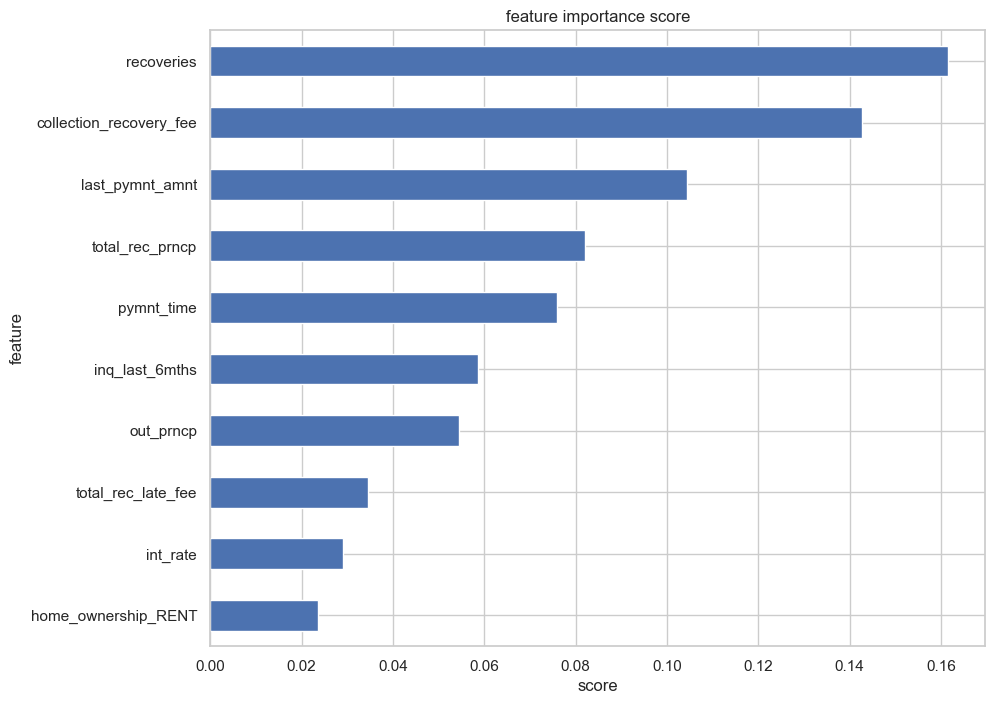

In [156]:
feat_importances = pd.Series(rf_best.feature_importances_, index=X_test.columns)#.best_estimator_
ax = feat_importances.nlargest(10).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()
plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')
plt.show()

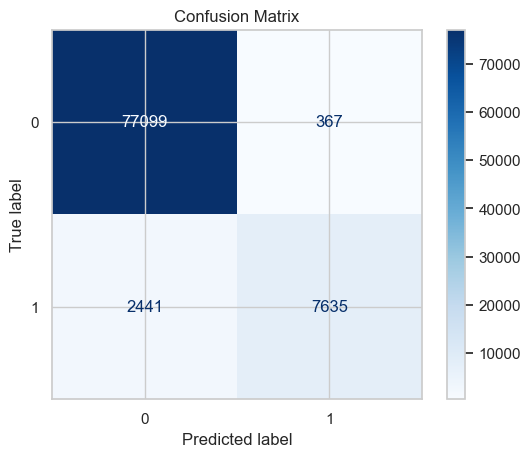

In [157]:
cm = confusion_matrix(y_test, y_pred_best)

# Buat dan tampilkan confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)  
plt.title('Confusion Matrix')
plt.show()

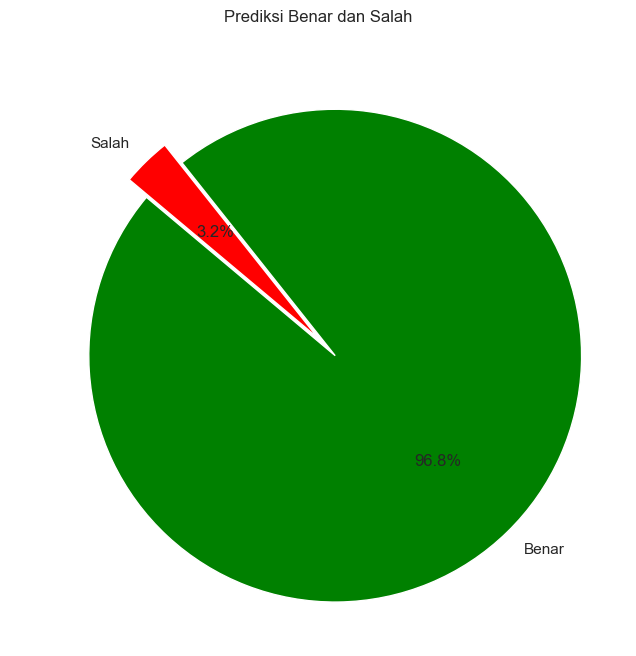

In [158]:
# Hitung prediksi benar dan salah
correct = sum(y_test == y_pred_best)
incorrect = sum(y_test != y_pred_best)

# Siapkan data untuk pie chart
labels = ['Benar', 'Salah']
sizes = [correct, incorrect]
colors = ['green', 'red'] 
explode = (0.1, 0)
# Buat pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', explode=explode, startangle=140)
plt.title('Prediksi Benar dan Salah')
plt.show()

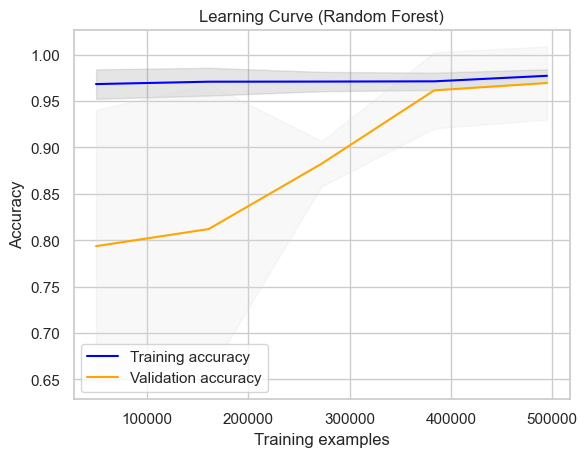

In [159]:
train_sizes = np.linspace(0.1, 1.0, 5)

train_sizes, train_scores, test_scores = learning_curve(
    rf_best,
    X_resampled,
    y_resampled,
    cv=5,  
    train_sizes=train_sizes,
    scoring='accuracy'  
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Learning Curve (Random Forest)")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, color="gray", alpha=0.2)
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, color="gainsboro", alpha=0.2)

plt.plot(train_sizes, train_scores_mean, label="Training accuracy", color="blue")
plt.plot(train_sizes, test_scores_mean, label="Validation accuracy", color="orange")

plt.legend(loc="best")
plt.show()

In conclusion, Model imbalance data demonstrates strong performance in identifying the majority class but lacks sensitivity to minority cases. Meanwhile, Model balance data, despite experiencing stagnation in training data accuracy, focuses more on handling minority classes after data balancing, making it more responsive to important cases within the dataset.

### Model using 10 best features

In [160]:
feat = feat_importances.sort_values(ascending=False).reset_index()
feat = feat[feat.index<10]
feat_10 = list(feat['index'])
len(feat_10)

10

In [161]:
feat_10

['recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'total_rec_prncp',
 'pymnt_time',
 'inq_last_6mths',
 'out_prncp',
 'total_rec_late_fee',
 'int_rate',
 'home_ownership_RENT']

In [167]:
rf_best10 = RandomForestClassifier(random_state=1, max_depth=30, min_samples_split=50, min_samples_leaf=50)
rf_best10.fit(X_resampled[feat_10],y_resampled)

y_train_pred_best10 = rf_best10.predict(X_resampled[feat_10])
y_pred_best10 = rf_best10.predict(X_test[feat_10])

eval_classification(rf_best10, y_train_pred_best10, y_pred_best10, y_resampled, y_test)

Accuracy (Train Set): 0.96
Accuracy (Test Set): 0.96
Precision (Train Set): 0.99
Precision (Test Set): 0.88
Recall (Train Set): 0.93
Recall (Test Set): 0.80
F1-Score (Train Set): 0.96
F1-Score (Test Set): 0.84
AUC (Train Set): 0.96
AUC (Test Set): 0.88


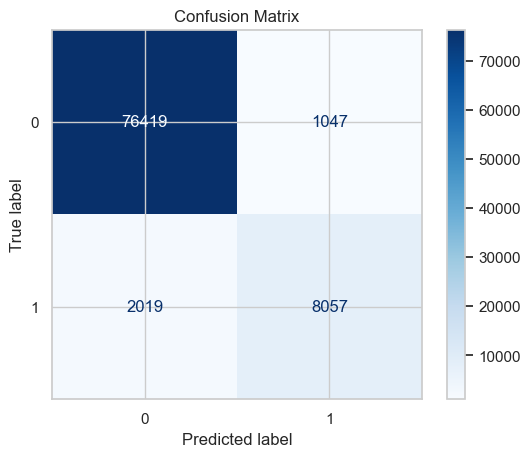

In [168]:
cm = confusion_matrix(y_test, y_pred_best10)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)  
plt.title('Confusion Matrix')
plt.show()

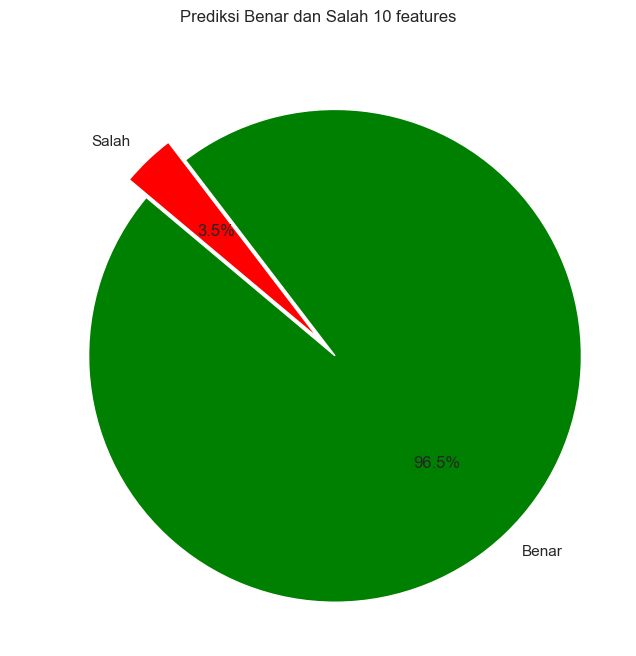

In [169]:
correct = sum(y_test == y_pred_best10)
incorrect = sum(y_test != y_pred_best10)

labels = ['Benar', 'Salah']
sizes = [correct, incorrect]
colors = ['green', 'red'] 
explode = (0.1, 0)

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', explode=explode, startangle=140)
plt.title('Prediksi Benar dan Salah 10 features')
plt.show()

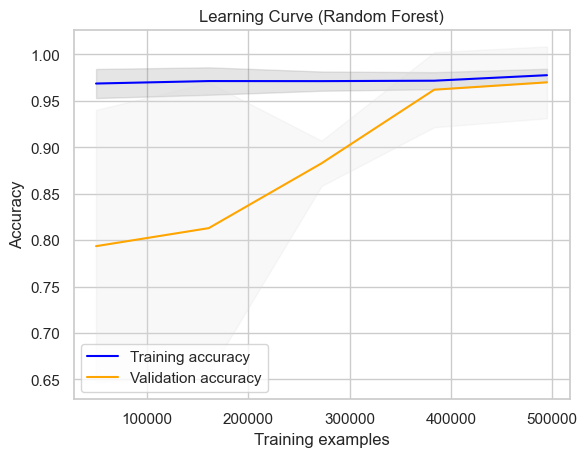

In [170]:
train_sizes = np.linspace(0.1, 1.0, 5)

train_sizes, train_scores, test_scores = learning_curve(
    rf_best10,
    X_resampled,
    y_resampled,
    cv=5,  
    train_sizes=train_sizes,
    scoring='accuracy'  
)


train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


plt.figure()
plt.title("Learning Curve (Random Forest)")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")


plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, color="gray", alpha=0.2)
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, color="gainsboro", alpha=0.2)

plt.plot(train_sizes, train_scores_mean, label="Training accuracy", color="blue")
plt.plot(train_sizes, test_scores_mean, label="Validation accuracy", color="orange")

plt.legend(loc="best")
plt.show()

1. High accuracy on both training and testing data (96% and 96%).
2. High precision on both sets, slightly lower than the all features model on the testing data.
3. Slightly higher recall on the testing data (80%) compared to the all features model.
4. Balanced performance between precision and recall on the testing data.